In [11]:
import numpy as np
import tensorflow as tf

In [12]:
images = np.random.rand(10,28,28,1)

In [13]:
images[0]

array([[[5.36972599e-01],
        [6.13022570e-01],
        [7.43676774e-01],
        [8.91470088e-01],
        [3.76467734e-01],
        [3.04366060e-01],
        [8.43582850e-01],
        [7.41522434e-01],
        [3.09341954e-01],
        [4.21385136e-01],
        [8.34452548e-02],
        [1.00868013e-02],
        [7.02515847e-01],
        [9.87863391e-01],
        [6.77653722e-01],
        [7.77099423e-01],
        [1.78663350e-02],
        [9.62206881e-01],
        [4.50194918e-01],
        [8.24793997e-01],
        [8.81257959e-02],
        [8.25494455e-01],
        [4.19776347e-01],
        [2.14589795e-01],
        [2.78000949e-01],
        [8.22885256e-01],
        [8.24484395e-02],
        [4.04766955e-01]],

       [[5.34878861e-01],
        [4.04764944e-01],
        [1.39696585e-01],
        [3.10144374e-01],
        [9.10412588e-01],
        [2.28547418e-01],
        [6.23697051e-01],
        [8.75814217e-01],
        [5.38966979e-01],
        [9.75577225e-01],
        [8

In [14]:
windows = tf.reshape(images, (10, 14, 14, 2, 2, 1))
print(windows.shape)

(10, 14, 14, 2, 2, 1)


In [15]:
windows = tf.transpose(windows, (0, 1, 2, 3, 4, 5))
print(windows.shape)

(10, 14, 14, 2, 2, 1)


In [16]:
windows = tf.reshape(windows, (10 * 196, 4, 1))
print(windows.shape)  

(1960, 4, 1)


In [17]:
windows[0]

<tf.Tensor: shape=(4, 1), dtype=float64, numpy=
array([[0.5369726 ],
       [0.61302257],
       [0.74367677],
       [0.89147009]])>

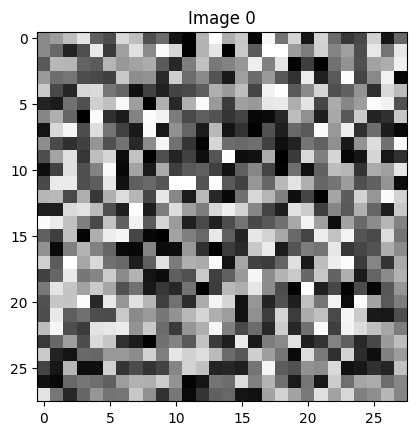

In [23]:
import matplotlib.pyplot as plt

for i in range(1):
  plt.imshow(images[i, :, :, 0], cmap='gray')  # Assuming grayscale images
  plt.title(f'Image {i}')
  plt.show()


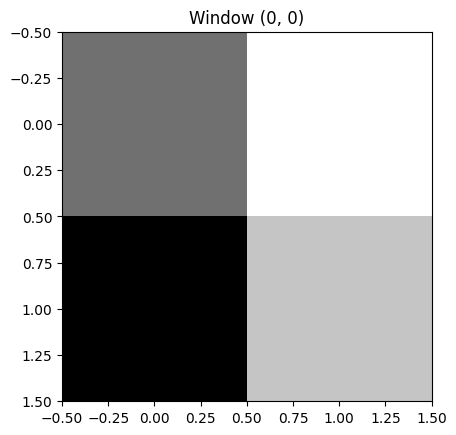

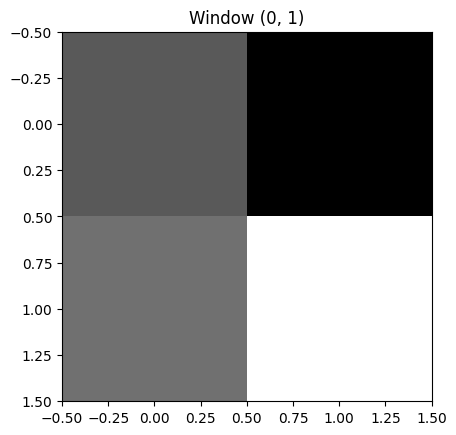

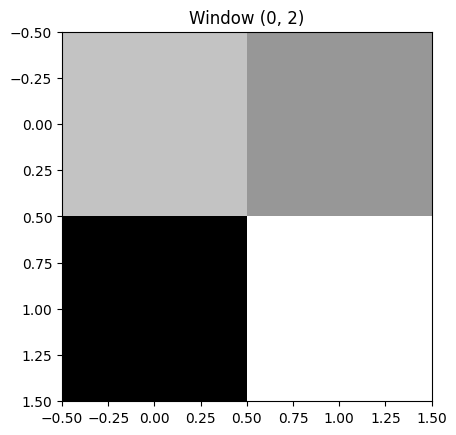

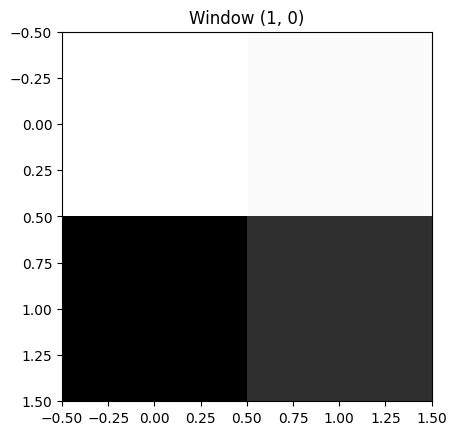

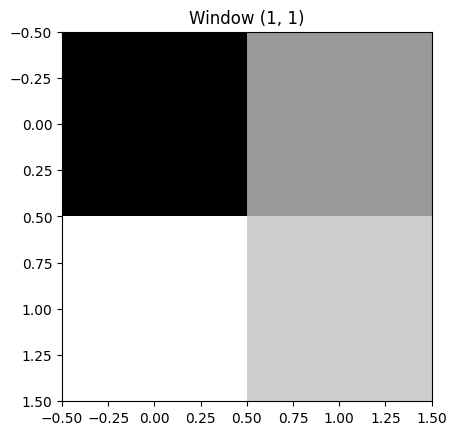

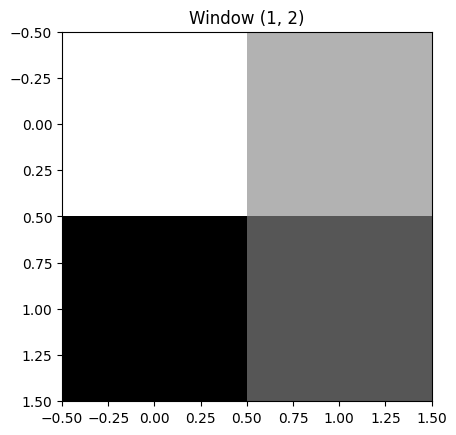

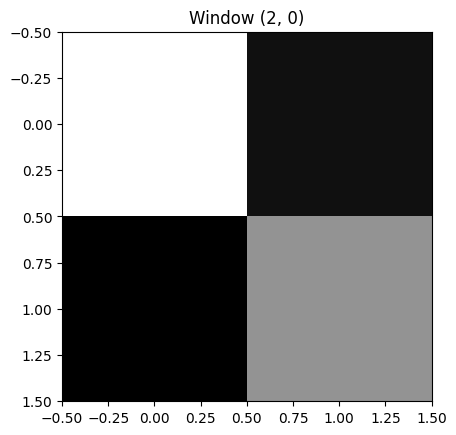

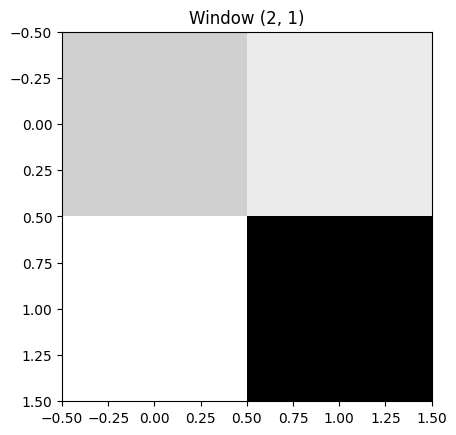

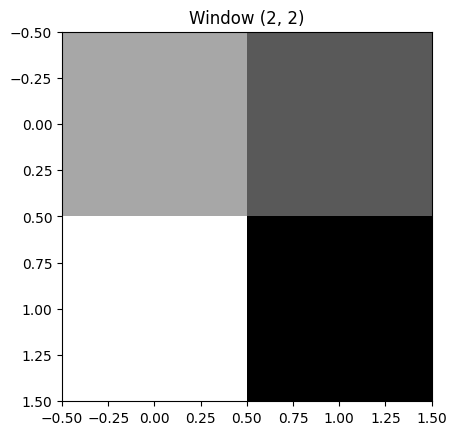

In [34]:
# Pick a specific image index
image_index = 0
images = np.random.rand(10,28,28,1)

# Extract windows from the selected image
windows = tf.reshape(images[image_index], (14, 14, 2, 2, 1))
windows = tf.transpose(windows, (0, 1, 3, 2, 4))

# Plot a selection of windows
for i in range(3):  # Plot 3 sample windows
  for j in range(3):
     plt.imshow(windows[i, j, :, :, 0], cmap='gray')
     plt.title(f'Window ({i}, {j})')
     plt.show()


In [44]:
import tensorflow as tf
import numpy as np

# Simulate a single 4x4 image (single channel)
image = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])
image = image.reshape((4, 4, 1))  # Add sample and channel dimensions
print(image.shape)
print(image)
# Corrected window extraction logic

def extract_windows2(image):
    num_samples, height, width, num_channels = image.shape  # Get image dimensions

    # Reshape to extract all 2x2 windows
    windows = tf.reshape(image, (num_samples, height // 2, width // 2, 2, 2, num_channels))
    windows = tf.transpose(windows, (0, 1, 3, 2, 4, 5)) 

    # Batching reshape
    windows = tf.reshape(windows, (num_samples * (height // 2) * (width // 2), 4, num_channels))

    return windows

def extract_windows(image):
    height, width, num_channels = image.shape  # Get image dimensions

    # Reshape to extract all 2x2 windows
    windows = tf.reshape(image, (height // 2, width // 2, 2, 2, num_channels))
    windows = tf.transpose(windows, (0, 2, 1, 3, 4)) 

    # Batching reshape
    windows = tf.reshape(windows, ((height // 2) * (width // 2), 4, num_channels))

    return windows
# Extract the windows
result = extract_windows(image)

# Print the extracted windows
for i, window in enumerate(result):
    print(f"Window {i+1}:\n", window)


(4, 4, 1)
[[[ 1]
  [ 2]
  [ 3]
  [ 4]]

 [[ 5]
  [ 6]
  [ 7]
  [ 8]]

 [[ 9]
  [10]
  [11]
  [12]]

 [[13]
  [14]
  [15]
  [16]]]
Window 1:
 tf.Tensor(
[[1]
 [2]
 [5]
 [6]], shape=(4, 1), dtype=int64)
Window 2:
 tf.Tensor(
[[3]
 [4]
 [7]
 [8]], shape=(4, 1), dtype=int64)
Window 3:
 tf.Tensor(
[[ 9]
 [10]
 [13]
 [14]], shape=(4, 1), dtype=int64)
Window 4:
 tf.Tensor(
[[11]
 [12]
 [15]
 [16]], shape=(4, 1), dtype=int64)


In [53]:
images = tf.random.normal(shape=(100, 28, 28, 1)) 
patches = tf.image.extract_patches(
    images=images,
    sizes=[1, 2, 2, 1],  # Patch size of 4x4
    strides=[1, 2, 2, 1],  # Stride of 2
    rates=[1, 1, 1, 1],  # No dilation
    padding='VALID'
)
first_image_first_patch = patches[0, 0, 0, :] 


In [55]:
first_image_first_patch
print(patches.shape)

(100, 14, 14, 4)


In [52]:
for batch_idx in range(patches.shape[0]):
    for patch_y in range(patches.shape[1]):
        for patch_x in range(patches.shape[2]):
            patch = patches[batch_idx, patch_y, patch_x, :]
            print(patch.shape)

(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)


In [62]:
batch_size = 100

for i in range(0, 100, batch_size):
    batch_patches = patches[i:i + batch_size]
    batch_patches = tf.reshape(batch_patches, [-1, 4])
    
    quantized_patches = tf.stack([print(patch.shape) for patch in tf.unstack(batch_patches) ])
    #print(batch_patches.shape)

(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)


ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.